# MICROSOFT'S ENTRY INTO THE MOVIE INDUSTRY

## BUSINESS UNDERSTANDING
This project aims to have an in-depth look into the possibility of Microsoft joining the movie industry as a key player creating original video content and a movie studio. Data collected will be used to observe current trends in top performing movies, personnel required and competing studios.


## DATA SOURCES
Data analysis will be sourced from several databases.
Financial records pertaining to grossing figures and movie budgets will be sourced from Box Office Movies, IMDB, TMDB and TN databases

In [24]:
#Importing necessary libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import sqlite3 as sql
import csv
import matplotlib.pyplot as plt
%matplotlib inline

# IMDB DATASET

This dataset contains a trove of information regarding movies and will be retrieved below; table by table.

In [2]:
conn = sql.connect('im.db')
cursor = conn.cursor()  
IMDB = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
IMDB

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


## Movie Basics table
This dataset contains a movie id that corresponds with the titles,genres, the year each movie started running and how long it runs for


In [3]:
movie_basics_table = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics_table.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## Movie Ratings Table

Movie ratings contains movie IDs, number of votes and average rating

In [4]:
movie_ratings_table = pd.read_sql('SELECT * FROM movie_ratings;', conn)
movie_ratings_table.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Movie AKA Table

This table contains information regarding movie release orders, titles, region, languages, attributes, types and if the title in the title column is the original title

In [5]:
movie_akas_table = pd.read_sql('SELECT * FROM movie_akas;', conn)
movie_akas_table.head()


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


## Known_for Table

This table displays a person's ID in the movie industry and the movie ID for the movie that they are known for.

In [6]:
known_for_table = pd.read_sql('SELECT * FROM known_for;', conn)
known_for_table.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


## Principal's Table

This table has infromtion regarding people who work in the movie industry. It matches each indiviadual to a movie, job, category and character.

In [7]:
principals_table = pd.read_sql('SELECT * FROM principals;', conn)
principals_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


# BOX OFFICE MOVIE DATASET

This file has data about movie titles, studios that produced them, the year they were produced and the gross total in domestic and foreign markets

In [8]:
bom = pd.read_csv('bom.movie_gross.csv')
bom.describe()
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# THE MOVIE DATABASE
This dataset has genre IDs, original language and title, popularity, release date and title of the movie.

In [9]:
tmdb = pd.read_csv('tmdb.movies.csv')
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# MOVIE REVIEWS DATA
This tsv file contains reviews from critics. Themovie IDs, reviews, ratings, critic, top critic, publisher and ate are listed in arow corresponding to the movie ID

In [10]:
reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding = 'latin -1')
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


# MOVIE INFO TABLE

Here we have a variety of data including: ID, synopsis, rating, genre, director, writer, theater date, dvd_date, curency, box office, runtime and studio associated with a specific movie.

In [11]:
movie_info =  pd.read_csv('rt.movie_info.tsv', sep='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# MOVIE BUDGETS

Movie budgets is a table that looks at the production budget against the groosing figures for each movie in the dataset.

In [12]:
movie_budgets =  pd.read_csv('tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# DATA PREPARATION


### 1. Merging IMDB datasets


In [13]:
#Merge movie_basics_table and movie_ratings_table using movie_id column
imdb_merge= pd.merge(movie_basics_table, movie_ratings_table, on = 'movie_id', how = 'inner')
imdb_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [14]:
#Select the most recent movies
imdb_recent = imdb_merge.loc[imdb_merge["start_year"] >= 2013]
imdb_recent

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


### 2. Merging Boxoffice and movie budgets

In [15]:
movie_finance = pd.merge(bom, movie_budgets, left_on= 'title', right_on = 'movie', how= 'inner')
movie_finance.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"


In [16]:
movie_recent = movie_finance.loc[movie_finance['year'] >= 2013]
movie_recent

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
496,Frozen,BV,400700000.0,875700000,2013,56,"Nov 22, 2013",Frozen,"$150,000,000","$400,738,009","$1,272,469,910"
497,Iron Man 3,BV,409000000.0,805800000,2013,48,"May 3, 2013",Iron Man 3,"$200,000,000","$408,992,272","$1,215,392,272"
498,Despicable Me 2,Uni.,368100000.0,602700000,2013,22,"Jul 3, 2013",Despicable Me 2,"$76,000,000","$368,065,385","$975,216,835"
499,The Hobbit: The Desolation of Smaug,WB (NL),258399999.0,700000000,2013,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,"$250,000,000","$258,366,855","$960,366,855"
500,The Hunger Games: Catching Fire,LGF,424700000.0,440300000,2013,38,"Nov 22, 2013",The Hunger Games: Catching Fire,"$130,000,000","$424,668,047","$864,868,047"
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,"$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656"


### 3. Merge all to create a dataframe for this analysis

The datasets IMDB title basics, IMDB title ratings, TN movie budgets and Box Office Movies from the last ten years will rovide the necessary information required to choose what films to invest in.

In [17]:
movie_project = pd.merge(imdb_recent,movie_recent, left_on = 'primary_title', right_on = 'title', how = 'inner')
movie_project

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
2,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
3,tt0435651,The Giver,The Giver,2014,97.0,"Drama,Romance,Sci-Fi",6.5,104999,The Giver,Wein.,45100000.0,21900000,2014,2,"Aug 15, 2014",The Giver,"$25,000,000","$45,090,374","$66,540,205"
4,tt0443465,Before We Go,Before We Go,2014,95.0,"Comedy,Drama,Romance",6.8,45181,Before We Go,RTWC,37200.0,NaN,2015,52,"Sep 4, 2015",Before We Go,"$3,000,000","$37,151","$483,938"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,tt7334528,Uncle Drew,Uncle Drew,2018,103.0,"Comedy,Sport",5.7,9739,Uncle Drew,LG/S,42500000.0,4200000,2018,85,"Jun 29, 2018",Uncle Drew,"$18,000,000","$42,469,946","$46,527,161"
814,tt7349662,BlacKkKlansman,BlacKkKlansman,2018,135.0,"Biography,Crime,Drama",7.5,149005,BlacKkKlansman,Focus,49300000.0,44000000,2018,21,"Aug 10, 2018",BlacKkKlansman,"$15,000,000","$49,275,340","$93,017,335"
815,tt7388562,"Paul, Apostle of Christ","Paul, Apostle of Christ",2018,108.0,"Adventure,Biography,Drama",6.7,5662,"Paul, Apostle of Christ",Affirm,17600000.0,5500000,2018,95,"Mar 23, 2018","Paul, Apostle of Christ","$5,000,000","$17,547,999","$25,529,498"
816,tt7401588,Instant Family,Instant Family,2018,118.0,"Comedy,Drama",7.4,46728,Instant Family,Par.,67400000.0,53200000,2018,20,"Nov 16, 2018",Instant Family,"$48,000,000","$67,363,237","$119,736,188"


In [18]:
movie_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 817
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           818 non-null    object 
 1   primary_title      818 non-null    object 
 2   original_title     818 non-null    object 
 3   start_year         818 non-null    int64  
 4   runtime_minutes    808 non-null    float64
 5   genres             817 non-null    object 
 6   averagerating      818 non-null    float64
 7   numvotes           818 non-null    int64  
 8   title              818 non-null    object 
 9   studio             818 non-null    object 
 10  domestic_gross_x   818 non-null    float64
 11  foreign_gross      685 non-null    object 
 12  year               818 non-null    int64  
 13  id                 818 non-null    int64  
 14  release_date       818 non-null    object 
 15  movie              818 non-null    object 
 16  production_budget  818 non

In [19]:
movie_project["domestic_gross_y"] = movie_project["domestic_gross_y"].map(lambda x: x.replace(",", ""))
movie_project["domestic_gross_y"] = movie_project["domestic_gross_y"].map(lambda x: x.replace("$", ""))
movie_project["domestic_gross_y"] = movie_project["domestic_gross_y"].astype("int64")
movie_project["worldwide_gross"] = movie_project["worldwide_gross"].map(lambda x: x.replace(",", ""))
movie_project["worldwide_gross"] = movie_project["worldwide_gross"].map(lambda x: x.replace("$", ""))
movie_project["worldwide_gross"] = movie_project["worldwide_gross"].astype("int64")
movie_project["production_budget"] = movie_project["production_budget"].map(lambda x: x.replace(",", ""))
movie_project["production_budget"] = movie_project["production_budget"].map(lambda x: x.replace("$", ""))
movie_project["production_budget"] = movie_project["production_budget"].astype("int64")
movie_project["foreign_gross"] = movie_project["foreign_gross"].astype("str")
movie_project["foreign_gross"] = movie_project["foreign_gross"].map(lambda x: x.replace(",", ""))
movie_project["foreign_gross"] = movie_project["foreign_gross"].fillna("missing")

In [20]:
movie_project

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587
2,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,1019.4,2015,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
3,tt0435651,The Giver,The Giver,2014,97.0,"Drama,Romance,Sci-Fi",6.5,104999,The Giver,Wein.,45100000.0,21900000,2014,2,"Aug 15, 2014",The Giver,25000000,45090374,66540205
4,tt0443465,Before We Go,Before We Go,2014,95.0,"Comedy,Drama,Romance",6.8,45181,Before We Go,RTWC,37200.0,nan,2015,52,"Sep 4, 2015",Before We Go,3000000,37151,483938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,tt7334528,Uncle Drew,Uncle Drew,2018,103.0,"Comedy,Sport",5.7,9739,Uncle Drew,LG/S,42500000.0,4200000,2018,85,"Jun 29, 2018",Uncle Drew,18000000,42469946,46527161
814,tt7349662,BlacKkKlansman,BlacKkKlansman,2018,135.0,"Biography,Crime,Drama",7.5,149005,BlacKkKlansman,Focus,49300000.0,44000000,2018,21,"Aug 10, 2018",BlacKkKlansman,15000000,49275340,93017335
815,tt7388562,"Paul, Apostle of Christ","Paul, Apostle of Christ",2018,108.0,"Adventure,Biography,Drama",6.7,5662,"Paul, Apostle of Christ",Affirm,17600000.0,5500000,2018,95,"Mar 23, 2018","Paul, Apostle of Christ",5000000,17547999,25529498
816,tt7401588,Instant Family,Instant Family,2018,118.0,"Comedy,Drama",7.4,46728,Instant Family,Par.,67400000.0,53200000,2018,20,"Nov 16, 2018",Instant Family,48000000,67363237,119736188


In [21]:
movie_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 817
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           818 non-null    object 
 1   primary_title      818 non-null    object 
 2   original_title     818 non-null    object 
 3   start_year         818 non-null    int64  
 4   runtime_minutes    808 non-null    float64
 5   genres             817 non-null    object 
 6   averagerating      818 non-null    float64
 7   numvotes           818 non-null    int64  
 8   title              818 non-null    object 
 9   studio             818 non-null    object 
 10  domestic_gross_x   818 non-null    float64
 11  foreign_gross      818 non-null    object 
 12  year               818 non-null    int64  
 13  id                 818 non-null    int64  
 14  release_date       818 non-null    object 
 15  movie              818 non-null    object 
 16  production_budget  818 non

In [22]:
movie_project["runtime_minutes"] = movie_project["runtime_minutes"].fillna(imdb_recent["runtime_minutes"].median())
movie_project["genres"] = movie_project["genres"].fillna("Missing")
movie_project["genres"] = movie_project["genres"].map(lambda x: x.split(","))

In [23]:
movie_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 817
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           818 non-null    object 
 1   primary_title      818 non-null    object 
 2   original_title     818 non-null    object 
 3   start_year         818 non-null    int64  
 4   runtime_minutes    818 non-null    float64
 5   genres             818 non-null    object 
 6   averagerating      818 non-null    float64
 7   numvotes           818 non-null    int64  
 8   title              818 non-null    object 
 9   studio             818 non-null    object 
 10  domestic_gross_x   818 non-null    float64
 11  foreign_gross      818 non-null    object 
 12  year               818 non-null    int64  
 13  id                 818 non-null    int64  
 14  release_date       818 non-null    object 
 15  movie              818 non-null    object 
 16  production_budget  818 non

In [27]:
movie_project.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587
2,tt0369610,Jurassic World,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,Jurassic World,Uni.,652300000.0,1019.4,2015,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
3,tt0435651,The Giver,The Giver,2014,97.0,"[Drama, Romance, Sci-Fi]",6.5,104999,The Giver,Wein.,45100000.0,21900000,2014,2,"Aug 15, 2014",The Giver,25000000,45090374,66540205
4,tt0443465,Before We Go,Before We Go,2014,95.0,"[Comedy, Drama, Romance]",6.8,45181,Before We Go,RTWC,37200.0,nan,2015,52,"Sep 4, 2015",Before We Go,3000000,37151,483938


In [30]:
movie_project['profit'] = movie_project['worldwide_gross'] - movie_project['production_budget']
movie_project

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,profit
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,34108587
2,tt0369610,Jurassic World,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,Jurassic World,Uni.,652300000.0,1019.4,2015,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
3,tt0435651,The Giver,The Giver,2014,97.0,"[Drama, Romance, Sci-Fi]",6.5,104999,The Giver,Wein.,45100000.0,21900000,2014,2,"Aug 15, 2014",The Giver,25000000,45090374,66540205,41540205
4,tt0443465,Before We Go,Before We Go,2014,95.0,"[Comedy, Drama, Romance]",6.8,45181,Before We Go,RTWC,37200.0,nan,2015,52,"Sep 4, 2015",Before We Go,3000000,37151,483938,-2516062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,tt7334528,Uncle Drew,Uncle Drew,2018,103.0,"[Comedy, Sport]",5.7,9739,Uncle Drew,LG/S,42500000.0,4200000,2018,85,"Jun 29, 2018",Uncle Drew,18000000,42469946,46527161,28527161
814,tt7349662,BlacKkKlansman,BlacKkKlansman,2018,135.0,"[Biography, Crime, Drama]",7.5,149005,BlacKkKlansman,Focus,49300000.0,44000000,2018,21,"Aug 10, 2018",BlacKkKlansman,15000000,49275340,93017335,78017335
815,tt7388562,"Paul, Apostle of Christ","Paul, Apostle of Christ",2018,108.0,"[Adventure, Biography, Drama]",6.7,5662,"Paul, Apostle of Christ",Affirm,17600000.0,5500000,2018,95,"Mar 23, 2018","Paul, Apostle of Christ",5000000,17547999,25529498,20529498
816,tt7401588,Instant Family,Instant Family,2018,118.0,"[Comedy, Drama]",7.4,46728,Instant Family,Par.,67400000.0,53200000,2018,20,"Nov 16, 2018",Instant Family,48000000,67363237,119736188,71736188


top grossing genres

Text(0.5, 1.0, 'worldwide gross vs genres')

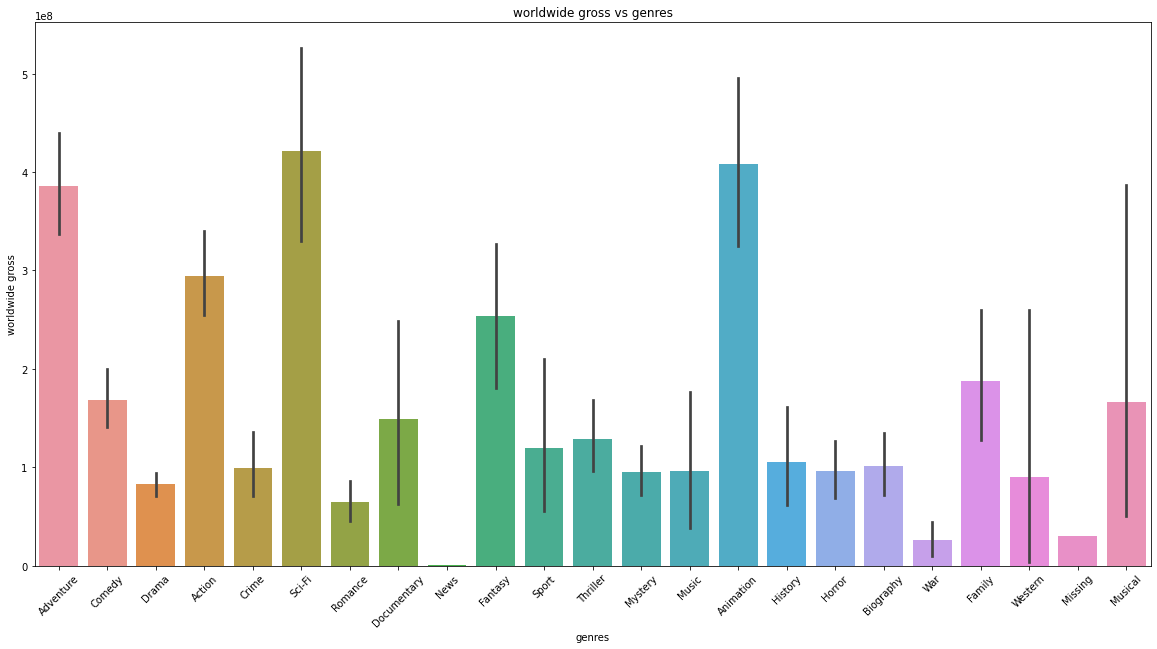

In [34]:
fig1, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x="genres", y="worldwide_gross", data=movie_project.explode("genres"))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel("genres")
ax.set_ylabel("worldwide gross")
ax.set_title("worldwide gross vs genres")


Top grossing genres worldwide: Sci-Fi, Animation, Adventure, Action, Fantasy

In [43]:
# see trend of total worlwide grossing figures by year
annual_gross = movie_project.explode("genres").groupby("start_year").sum()
annual_gross

,runtime_minutes,averagerating,numvotes,domestic_gross_x,year,id,production_budget,domestic_gross_y,worldwide_gross,profit
start_year,,,,,,,,,,
2013,42086.0,2525.8,62777866,2.613261e+10,775175,19550,20186572119,25878799685,65116006317,44929434198
2014,42346.0,2507.3,59438926,2.439696e+10,769460,18587,17677550000,24317089370,63182422841,45504872841
2015,42494.0,2472.6,44209465,2.304295e+10,775856,20102,18240986865,23462430199,60858072265,42617085400
2016,42652.0,2540.0,43851517,2.915516e+10,792329,21133,20578357373,29139668532,72399467565,51821110192
2017,28236.0,1640.0,29130231,2.033331e+10,514315,13590,15944757373,20327101834,57369474056,41424716683
2018,28777.0,1639.9,22643526,2.296425e+10,512540,14196,14322900000,22981064772,58331506704,44008606704
2019,1171.0,70.3,116,3.776310e+08,22160,490,226100000,276598798,430549651,204449651


Text(0.5, 1.0, 'worldwide gross vs years')

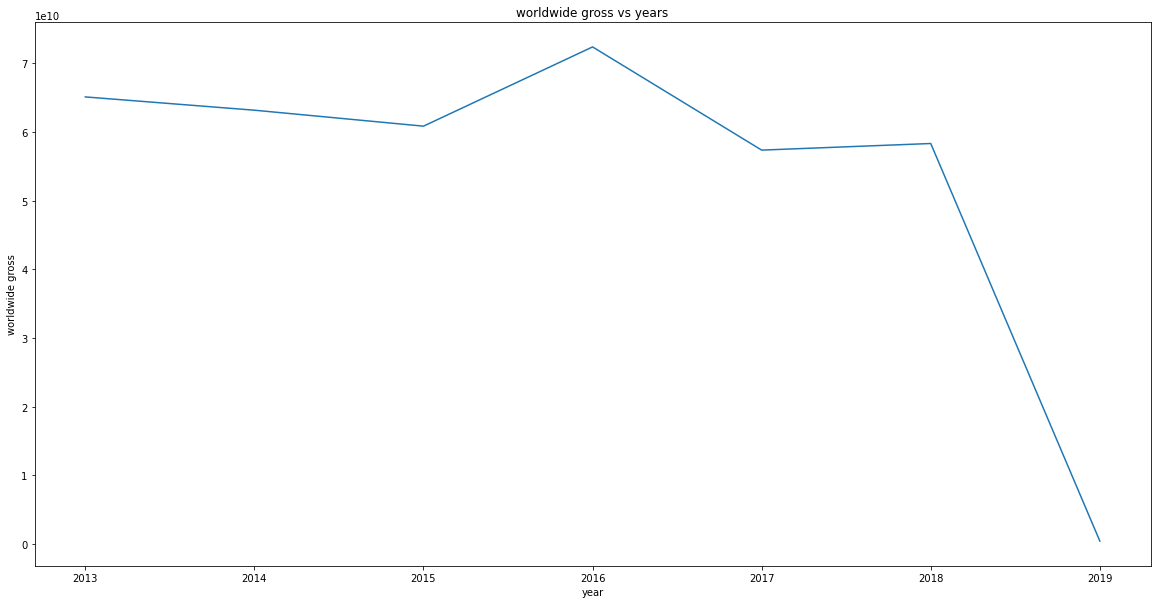

In [39]:
fig2, ax = plt.subplots(figsize=(20, 10))
ax.plot(world_trend["worldwide_gross"])
ax.set_ylabel("worldwide gross")
ax.set_xlabel("year")
ax.set_title("worldwide gross vs years")


Text(0.5, 1.0, 'production budget vs worldwide gross')

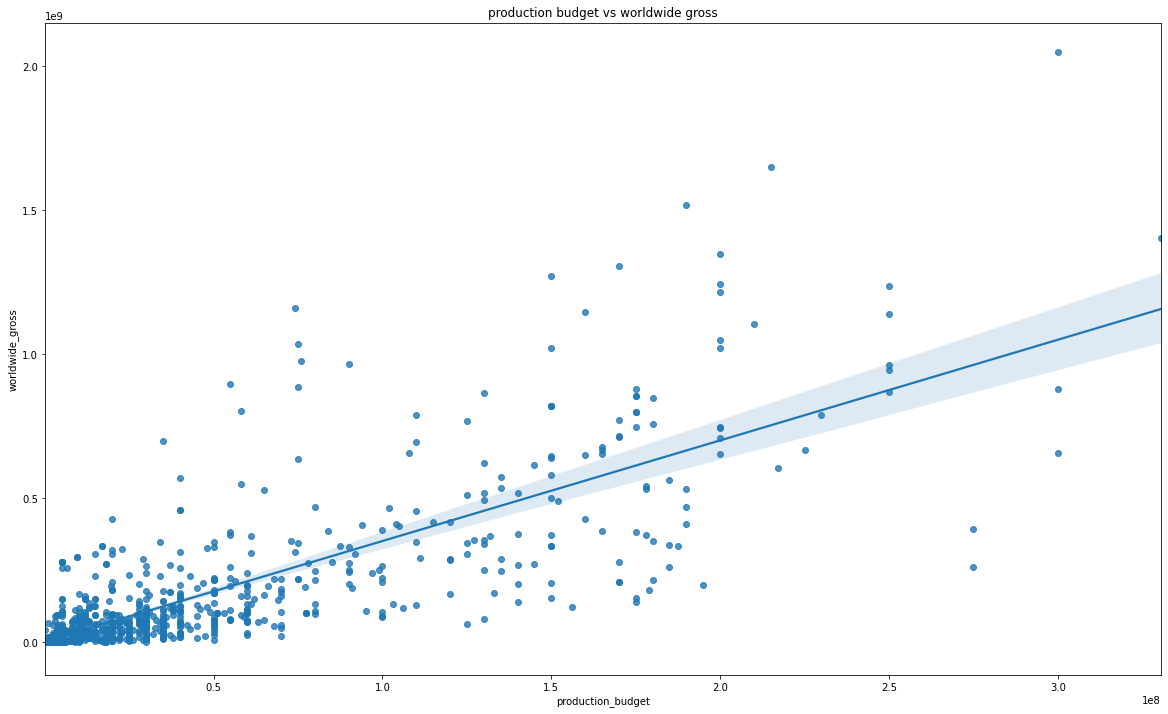

In [42]:
fig4, ax = plt.subplots(figsize=(20, 12))

sns.regplot(x="production_budget", y="worldwide_gross", data=movie_project)

ax.set_title("production budget vs worldwide gross") 
